In [6]:
import cortex
import numpy as np
#subject, xfm = 'AHfs', '20180816AH-sg'
subject, xfm = 'AA', '20180905AA-sg-auto'
mask = cortex.db.get_mask(subject, xfm)

KeyError: 'AHfs'

#### functional

In [4]:
# choose functional roi 
roi = 'AC'
# get 3d mask of voxels that belong to roi
roi_mask = cortex.utils.get_roi_masks(subject, xfm, roi_list = [roi], gm_sampler = 'cortical', split_lr = False, threshold = None, return_dict = True)[roi]
# get indices of roi voxels in cortical map
roi_vox = np.where(roi_mask[np.where(mask)])[0]

Cutting 0 overlapping voxels (should be < ~50)


ValueError: NumPy boolean array indexing assignment cannot assign 1319700 input values to the 1320616 output values where the mask is true

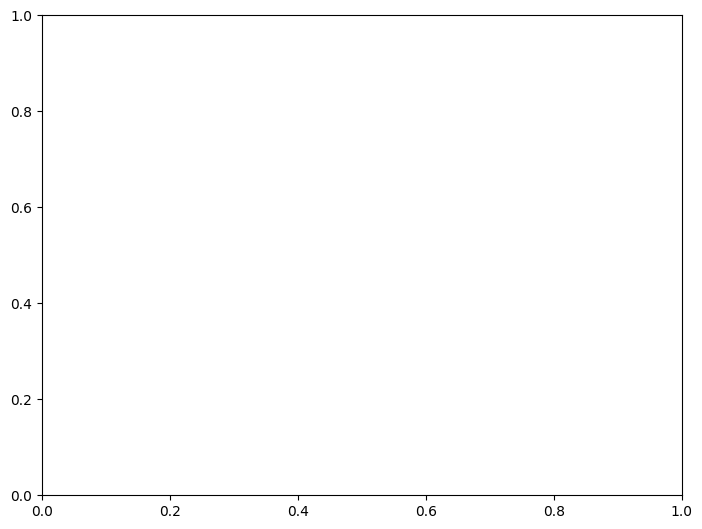

In [5]:
# plot roi voxels
fm = np.zeros(np.sum(mask))
fm[roi_vox] = 1
data_3d = cortex.unmask(mask, fm)
data_vol = cortex.Volume(data_3d, subject, xfm, cmap='hot', vmin=0, vmax=1)
cortex.quickshow(data_vol, with_labels=True, with_rois=True, linewidth=5, thick=1);

#### anatomical

In [4]:
# choose anatomical roi (https://surfer.nmr.mgh.harvard.edu/fswiki/CorticalParcellation)
roi = 'superiorfrontal'
# load anatomical roi
roi_vox = np.load('%s_roi.npy' % subject, allow_pickle = True).item()[roi]

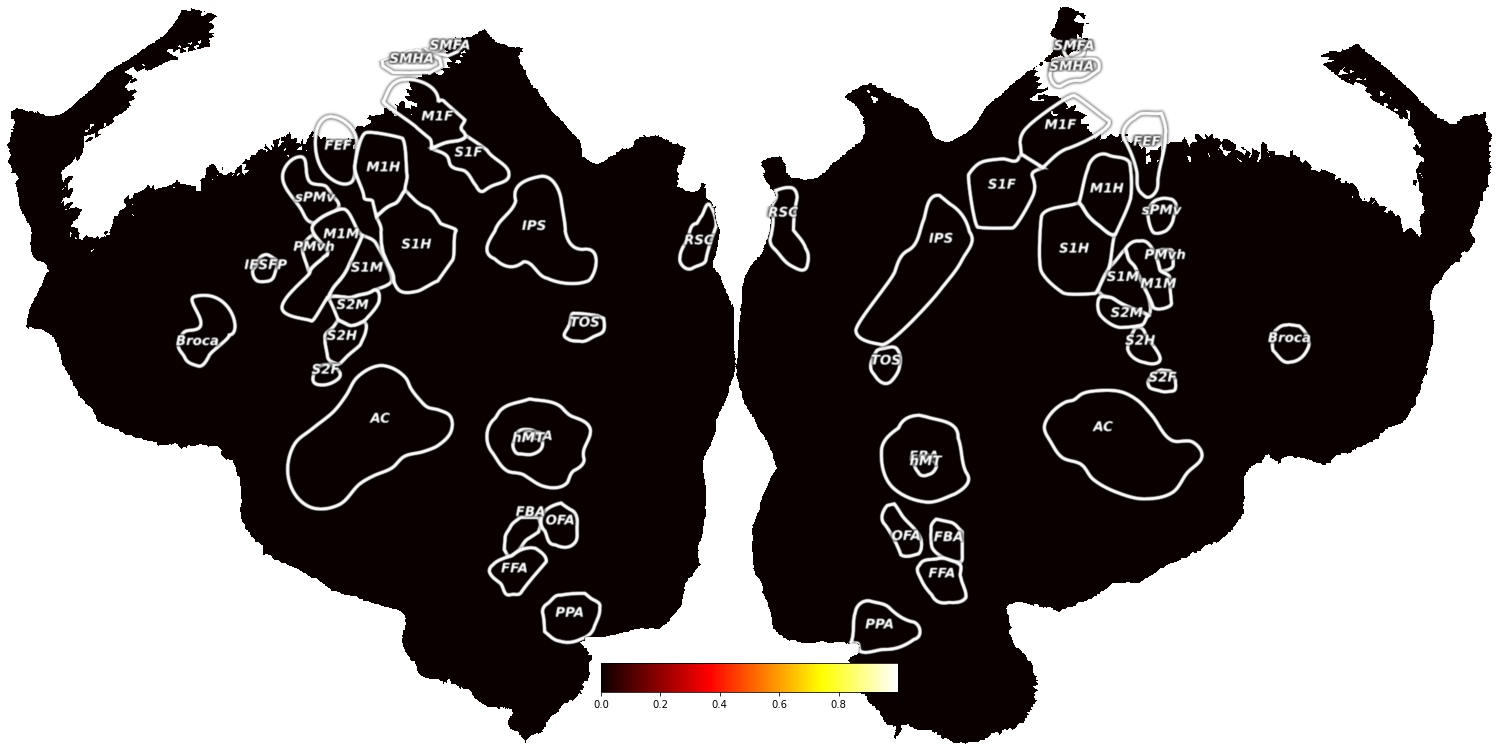

In [5]:
# plot roi voxels
fm = np.zeros(np.sum(mask))
fm[roi_vox] = 1
data_3d = cortex.unmask(mask, fm)
data_vol = cortex.Volume(data_3d, subject, xfm, cmap='hot', vmin=0, vmax=1)
cortex.quickshow(data_vol, with_labels=True, with_rois=True, linewidth=5, thick=1);